In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 

data_path = '/content/drive/MyDrive/ solar power/'

train = pd.read_csv(data_path + 'train/train.csv')

In [3]:
#hour angle 추가
h_list=[]
len(train['Hour'])
for i in range(len(train['Hour'])):
  h=train.loc[i,'Hour']
  min=train.loc[i,'Minute']
  if min!=30:
    hour_angle=15*(h-12)-7.5
    h_list.append(hour_angle)
  else:
    hour_angle=15*(h-12)
    h_list.append(hour_angle)

train['h']=h_list

In [4]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5


In [5]:
# Time 변수 생성 
train['Time'] = train['Hour'] * 60 + train['Minute']
train.to_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
 9   h       52560 non-null  float64
 10  Time    52560 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 4.4 MB


In [6]:
train['Cos'] = np.cos(2*np.pi*(train['Time']/24/60))
train['Sin'] = np.sin(2*np.pi*(train['Time']/24/60))

In [7]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5,0,1.000000,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0,30,0.991445,0.130526
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5,60,0.965926,0.258819
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0,90,0.923880,0.382683
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5,120,0.866025,0.500000


In [8]:
b = 17.62
c = 243.12
r = np.log(train['RH']/100)+((b*train['T'])/(c+train['T']))
train['Td'] = (c*r)/(b-r)

In [9]:
# 날짜별 데이터프레임 쪼개기
train_day = []
list_day = [] 
DAY = 0

for n in range(0,train.shape[0]):

    if train.loc[n, 'Day'] == DAY:
        list_day.append(train.loc[n, ['Time','TARGET']])
        
    else:
        day = pd.DataFrame(list_day, columns = ['Time', 'TARGET'], index = range(0,48))
        train_day.append(day)

        list_day = []
        list_day.append(train.loc[n, ['Time','TARGET']])
    DAY = train.loc[n, 'Day']



In [10]:
print(train_day)

[      Time     TARGET
0      0.0   0.000000
1     30.0   0.000000
2     60.0   0.000000
3     90.0   0.000000
4    120.0   0.000000
5    150.0   0.000000
6    180.0   0.000000
7    210.0   0.000000
8    240.0   0.000000
9    270.0   0.000000
10   300.0   0.000000
11   330.0   0.000000
12   360.0   0.000000
13   390.0   0.000000
14   420.0   0.000000
15   450.0   0.000000
16   480.0   7.039287
17   510.0   5.912871
18   540.0  22.337268
19   570.0  29.469529
20   600.0  25.339762
21   630.0  25.152060
22   660.0  28.718397
23   690.0  33.129393
24   720.0  19.427151
25   750.0  25.715166
26   780.0  24.589225
27   810.0  21.304405
28   840.0  11.731500
29   870.0  14.734764
30   900.0   5.818888
31   930.0   7.602096
32   960.0   4.035725
33   990.0   0.938541
34  1020.0   0.000000
35  1050.0   0.000000
36  1080.0   0.000000
37  1110.0   0.000000
38  1140.0   0.000000
39  1170.0   0.000000
40  1200.0   0.000000
41  1230.0   0.000000
42  1260.0   0.000000
43  1290.0   0.000000
44  1320.

In [11]:
# 일출시간, 일몰시간 구하기
new = pd.DataFrame(columns = ['Day', '일출시간', '일몰시간', '일조시간'])

for i in range(0,len(train_day)):
    for d1 in range(0,48):
        if train_day[i].loc[d1,'TARGET'] != 0:
            sunrise = train_day[i].loc[d1,'Time']
            break

    for d2 in range(47,-1,-1):
        if train_day[i].loc[d2,'TARGET'] != 0:
            sunset = train_day[i].loc[d2 + 1,'Time']
            break
        
    new.loc[i] = [i, sunrise, sunset, sunset - sunrise]

new.to_csv('new.csv')

In [12]:
new_train = pd.read_csv('new.csv')

In [13]:
new_train.head()

,Unnamed: 0,Day,일출시간,일몰시간,일조시간
0,0,0.0,480.0,1020.0,540.0
1,1,1.0,480.0,1020.0,540.0
2,2,2.0,480.0,1020.0,540.0
3,3,3.0,480.0,1020.0,540.0
4,4,4.0,480.0,1020.0,540.0


In [14]:
# 하지, 동지 구하기

summer = new.loc[new['일조시간'].idxmax(), 'Day']
winter = new.loc[new['일조시간'].idxmin(), 'Day']

print(summer, winter)

# 138 + 195 = 233 -> 1월 1일

138.0 356.0


In [15]:
N=[]
#1월 1일 기준 N+171 = 하지 기준 N
for i in range(len(train['Day'])):
  day=train.loc[i,'Day']
  if day==summer:
    N.append(+171)
  else:
    N.append(day-summer+171)


#N Feature 생성
#N이 음수, 364 초과를 변환(1월 1일 기준 N=0)
train['N']=N
day_max=train['N'].max()
day_min=train['N'].min()

while day_max>364 or day_max<0:
  for i in range(len(train['N'])):
    day=train.loc[i,'N']
    if day<0:
      train.loc[i,'N']=day+365
    elif day>364:
      train.loc[i,'N']=day-365
    else:
      pass
  day_max=train['N'].max()
  day_min=train['N'].min()

#현재 N은 한국 기준이므로, UT로 변환
train['N']-=0.375


In [16]:
#Declination of the Sun

def radian_angle(x):
  return x*np.pi/180

def dec_sun(N):
  return -1*np.arcsin(0.39779*np.cos(radian_angle(0.98565)*(N+10)+radian_angle(1.914)*np.sin(radian_angle(0.98565)*(N-2))))

train['Declination']=dec_sun(train['N'])

In [17]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5,0,1.000000,0.000000,-16.522271,32.625,-0.295314
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0,30,0.991445,0.130526,-16.525742,32.625,-0.295314
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5,60,0.965926,0.258819,-16.061776,32.625,-0.295314
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0,90,0.923880,0.382683,-16.066807,32.625,-0.295314
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5,120,0.866025,0.500000,-15.500215,32.625,-0.295314


In [18]:
#Zenith Angle

#관측자 위도 설정
alt=37.54

def zenith_angle(altitude,declination,hour_angle):
  return np.sin(radian_angle(altitude))*np.sin(declination)+np.cos(radian_angle(altitude))*np.cos(declination)*np.cos(radian_angle(hour_angle))

train['Zenith_Angle']=zenith_angle(alt,train['Declination'],train['h'])

In [19]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5,0,1.000000,0.000000,-16.522271,32.625,-0.295314,-0.929448
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0,30,0.991445,0.130526,-16.525742,32.625,-0.295314,-0.935938
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5,60,0.965926,0.258819,-16.061776,32.625,-0.295314,-0.929448
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0,90,0.923880,0.382683,-16.066807,32.625,-0.295314,-0.910089
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5,120,0.866025,0.500000,-15.500215,32.625,-0.295314,-0.878193


In [20]:
#GHI

train['GHI']=train['DHI']+train['DNI']*train['Zenith_Angle']

In [21]:
train.head(226)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle,GHI
0,0,0,0,0,0,1.5,69.08,-12,0.000000,-187.5,0,1.000000,0.000000,-16.522271,32.625,-0.295314,-0.929448,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.000000,-180.0,30,0.991445,0.130526,-16.525742,32.625,-0.295314,-0.935938,0.000000
2,0,1,0,0,0,1.6,71.78,-12,0.000000,-172.5,60,0.965926,0.258819,-16.061776,32.625,-0.295314,-0.929448,0.000000
3,0,1,30,0,0,1.6,71.75,-12,0.000000,-165.0,90,0.923880,0.382683,-16.066807,32.625,-0.295314,-0.910089,0.000000
4,0,2,0,0,0,1.6,75.20,-12,0.000000,-157.5,120,0.866025,0.500000,-15.500215,32.625,-0.295314,-0.878193,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,4,14,30,142,100,7.1,74.91,5,16.422476,30.0,870,-0.793353,-0.608761,0.916693,36.625,-0.274578,0.495762,191.576179
222,4,15,0,96,4,6.9,74.50,5,9.196587,37.5,900,-0.707107,-0.707107,0.840418,36.625,-0.274578,0.440297,97.761187
223,4,15,30,68,0,6.4,80.02,4,6.381375,45.0,930,-0.608761,-0.793353,0.862829,36.625,-0.274578,0.374471,68.000000
224,4,16,0,38,0,6.0,78.19,4,3.566063,52.5,960,-0.500000,-0.866025,0.541769,36.625,-0.274578,0.299412,38.000000


In [22]:
test = pd.read_csv(data_path+'test/0.csv')
for i in range(1,81):
    data_path1 = data_path + 'test/' + str(i) +'.csv'
    test1 = pd.read_csv(data_path1)
    test = test.append(test1, ignore_index = True)

In [23]:
test.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
27211,6,21,30,0,0,0.8,63.35,13.7,0.0
27212,6,22,0,0,0,0.7,64.82,13.1,0.0
27213,6,22,30,0,0,0.7,66.10,12.8,0.0
27214,6,23,0,0,0,0.6,67.64,12.4,0.0
27215,6,23,30,0,0,0.6,69.44,12.0,0.0


In [24]:
#hour angle 추가
h_list=[]
len(test['Hour'])
for i in range(len(test['Hour'])):
  h=test.loc[i,'Hour']
  min=test.loc[i,'Minute']
  if min!=30:
    hour_angle=15*(h-12)-7.5
    h_list.append(hour_angle)
  else:
    hour_angle=15*(h-12)
    h_list.append(hour_angle)

test['h']=h_list

In [25]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5


In [26]:
test['Time'] = test['Hour'] * 60 + test['Minute']
test.to_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27216 entries, 0 to 27215
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     27216 non-null  int64  
 1   Hour    27216 non-null  int64  
 2   Minute  27216 non-null  int64  
 3   DHI     27216 non-null  int64  
 4   DNI     27216 non-null  int64  
 5   WS      27216 non-null  float64
 6   RH      27216 non-null  float64
 7   T       27216 non-null  float64
 8   TARGET  27216 non-null  float64
 9   h       27216 non-null  float64
 10  Time    27216 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.3 MB


In [27]:
test['Cos'] = np.cos(2*np.pi*(test['Time']/24/60))
test['Sin'] = np.sin(2*np.pi*(test['Time']/24/60))

In [28]:
b = 17.62
c = 243.12
r = np.log(test['RH']/100)+((b*test['T'])/(c+test['T']))
test['Td'] = (c*r)/(b-r)

In [29]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278


In [30]:
# 날짜별 데이터프레임 쪼개기
test_day = []
list_day_1 = [] 
DAY = 0

for n in range(0,test.shape[0]):

    if test.loc[n, 'Day'] == DAY:
        list_day_1.append(test.loc[n, ['Time','TARGET']])
        
    else:
        day = pd.DataFrame(list_day_1, columns = ['Time', 'TARGET'], index = range(0,48))
        test_day.append(day)

        list_day_1 = []
        list_day_1.append(test.loc[n, ['Time','TARGET']])
    DAY = test.loc[n, 'Day']



In [31]:
# 일출시간, 일몰시간 구하기
new_1 = pd.DataFrame(columns = ['Day', '일출시간', '일몰시간', '일조시간'])

for i in range(0,len(test_day)):
    for d1 in range(0,48):
        if test_day[i].loc[d1,'TARGET'] != 0:
            sunrise = test_day[i].loc[d1,'Time']
            break

    for d2 in range(47,-1,-1):
        if test_day[i].loc[d2,'TARGET'] != 0:
            sunset = test_day[i].loc[d2 + 1,'Time']
            break
        
    new_1.loc[i] = [i, sunrise, sunset, sunset - sunrise]

new_1.to_csv('new_1.csv')

In [32]:
# 하지, 동지 구하기

test_summer = new_1.loc[new_1['일조시간'].idxmax(), 'Day']
test_winter = new_1.loc[new_1['일조시간'].idxmin(), 'Day']

print(test_summer, test_winter)

# 138 + 195 = 233 -> 1월 1일

183.0 0.0


In [33]:
N=[]
#1월 1일 기준 N+171 = 하지 기준 N
for i in range(len(test['Day'])):
  day=test.loc[i,'Day']
  if day==test_summer:
    N.append(+171)
  else:
    N.append(day-test_summer+171)


#N Feature 생성
#N이 음수, 364 초과를 변환(1월 1일 기준 N=0)
test['N']=N
day_max=test['N'].max()
day_min=test['N'].min()

while day_max>364 or day_max<0:
  for i in range(len(test['N'])):
    day=test.loc[i,'N']
    if day<0:
      test.loc[i,'N']=day+365
    elif day>364:
      test.loc[i,'N']=day-365
    else:
      pass
  day_max=test['N'].max()
  day_min=test['N'].min()

#현재 N은 한국 기준이므로, UT로 변환
test['N']-=0.375


In [34]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625


In [35]:
test['Declination']=dec_sun(test['N'])

In [36]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491


In [37]:
test['Zenith_Angle']=zenith_angle(alt,test['Declination'],test['h'])

In [38]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491,-0.963497
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491,-0.969722
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491,-0.963497
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491,-0.944927
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491,-0.914330


In [39]:
test['GHI']=test['DHI']+test['DNI']*test['Zenith_Angle']

In [40]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle,GHI
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491,-0.963497,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491,-0.969722,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491,-0.963497,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491,-0.944927,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491,-0.914330,0.0


In [41]:
test['TARGET'][17]

6.19359914

In [42]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle,GHI
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491,-0.963497,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491,-0.969722,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491,-0.963497,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491,-0.944927,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491,-0.914330,0.0


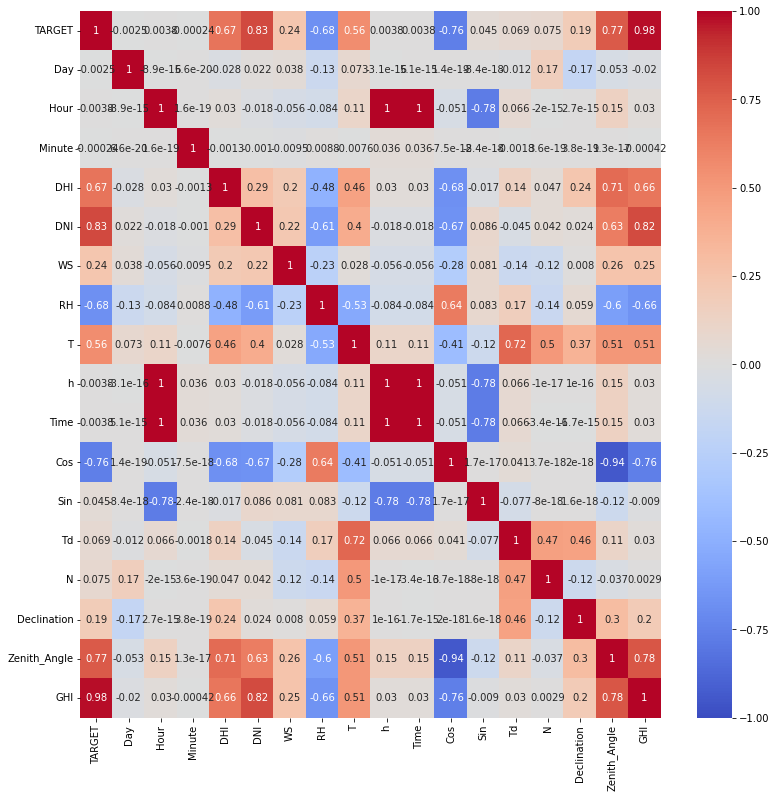

In [43]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df_pair = train[['TARGET', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T',	'h','Time', 'Cos','Sin','Td','N','Declination','Zenith_Angle','GHI']]


plt.gcf().set_size_inches(13, 13)
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

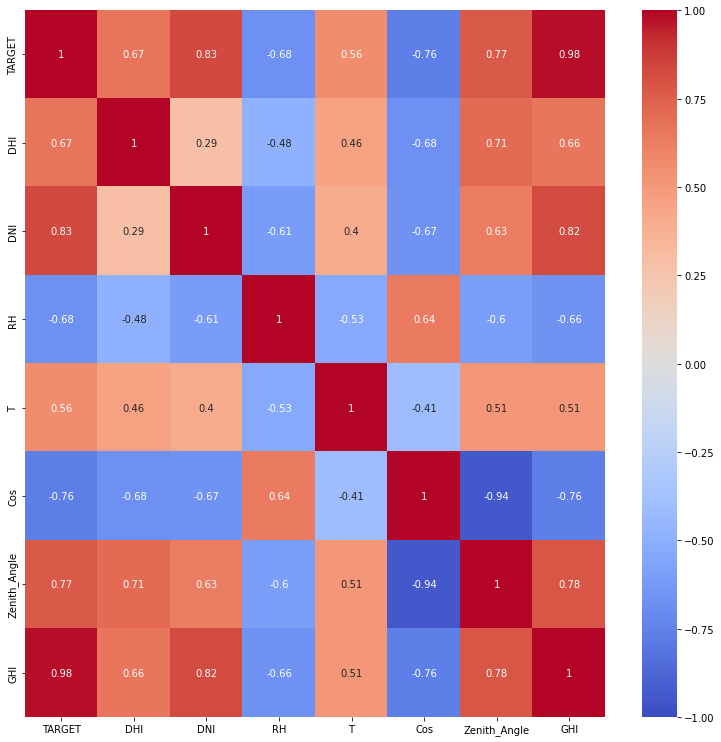

In [44]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df_pair = train[['TARGET', 'DHI', 'DNI', 'RH', 'T', 'Cos','Zenith_Angle','GHI']]


plt.gcf().set_size_inches(13, 13)
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

x_train=train.drop(['Sin','Td','N','Declination', 'h','Time', 'WS','Day', 'Hour', 'Minute', 'TARGET'], axis=1)
y_train=train['TARGET']
x_test=test.drop(['Sin','Td','N','Declination', 'h','Time', 'WS','Day', 'Hour', 'Minute', 'TARGET'], axis=1)
y_test=test['TARGET']

In [46]:
import lightgbm as lgb

clf = lgb.LGBMRegressor()
clf.fit(x_train, y_train)

LGBMRegressor()

In [47]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.45869027541056406

mae_test(mae):  2.9520140029839066
r2_score(r2):  0.9346481801862766


In [58]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.1408167994171517

mae_test(mae):  3.3165595794169307
r2_score(r2):  0.9109519749410459


In [65]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [67]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(r2_score, greater_is_better=False)
# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수

In [68]:
gridsearch_ridge_model.fit(x_train, y_train) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(r2_score, greater_is_better=False))

In [69]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 1000, 'max_iter': 3000}


In [70]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(x_test) 

# 평가
print(f'릿지 회귀 r2_score 값 : {r2_score(y_test, preds):.4f}') 

릿지 회귀 r2_score 값 : 0.8343


In [71]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
gridsearch_lasso_model.fit(x_train, y_train)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 10.0, 'max_iter': 3000}


In [72]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(x_test)

# 평가
print(f'라쏘 회귀 r2_score 값 : {r2_score(y_test, preds):.4f}')

라쏘 회귀 r2_score 값 : 0.8077


In [73]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
rmsle_scorer = metrics.make_scorer(r2_score, greater_is_better=False)
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[20, 40, 60, 80 ,100, 120, 140, 160, 180, 200]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
gridsearch_random_forest_model.fit(x_train, y_train)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 20, 'random_state': 42}


In [74]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(x_test)

# 평가
print(f'랜덤 포레스트 회귀 rms 값 : {mean_absolute_error(y_test, preds):.4f}')

랜덤 포레스트 회귀 r2_score 값 : 0.9099


In [75]:
preds = pd.DataFrame(preds)

In [77]:
y_test = pd.DataFrame(y_test)

In [88]:
print(preds[0][20])
print(y_test['TARGET'][20])

20.029188412
20.08145936


In [89]:
y = pd.concat([preds,y_test],axis=1)

In [93]:
y.columns=['Y_Pred','Y_test']

In [101]:
y.head(30)

,Y_Pred,Y_test
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


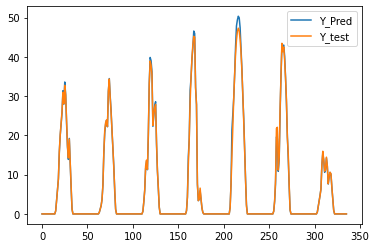

In [98]:
y[:48*7].plot()